## 자연어 처리 과제입니다

파일명 제출 : nlp_{이름}.ipynb  
제출기한일 : 2023.10.10  
제출 이메일 : bluelemonsky7@gmail.com  
분석 대상 데이터 : 네이버 평점 test 데이터

평가 관점
1. 코드를 작성하여 error 없이 진행해야 함
2. 각종 모델을 비교하거나 선택한 이유 등을 작성
3. train : test 비율은 7:3으로 함
4. 최종 평가에서 train 데이터에 대한 정확도 90 이상, test 데이터에 대한 정확도는 85 이상을 목표로 함
5. 모델 평가에서 고정된 결과가 나오도록 하세요 (random seed 설정)

Part 1 . 분석 환경에 대한 정보를 보여주세요

1. python 버전 = 3.10.13
2. 주요 사용 패키지 버전 정보 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print('pandas :', pd.__version__)

pandas : 2.1.1


Part 2. 분석 데이터를 로드하세요

1. 판다스로 데이터를 read 하세요

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', sep='\t', encoding='utf-8')
test = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', sep='\t', encoding='utf-8')

display(train.head())
print('😊')
display(test.head())

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


😊


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


Part 3. 텍스트 데이터를 EDA하세요

1. 통계적으로 텍스트를 확인해 보세요
2. 시각화 해보세요
3. 불용어(stop words)를 찾아보세요
4. 기타 여러 방법으로 EDA를 해보세요

In [3]:
train[train.label == 0]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
...,...,...,...
149990,6373651,이걸 영화라고 찎었냐?,0
149992,9335962,공포나 재난영화가 아니라 아예 대놓고 비급 크리쳐개그물임ㅋㅋ 음악 완전 흥겹다ㅋ 5...,0
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
None


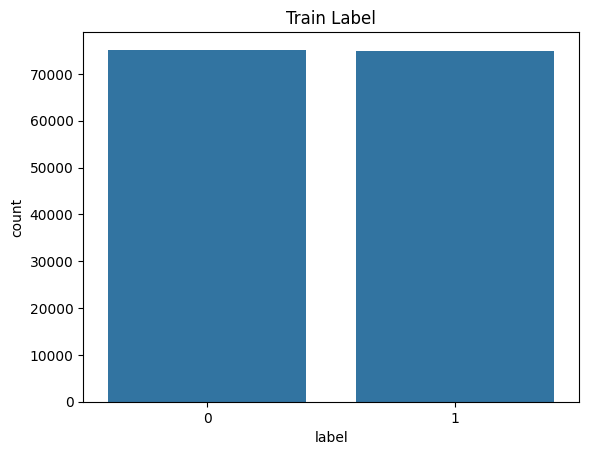


😊
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB
None


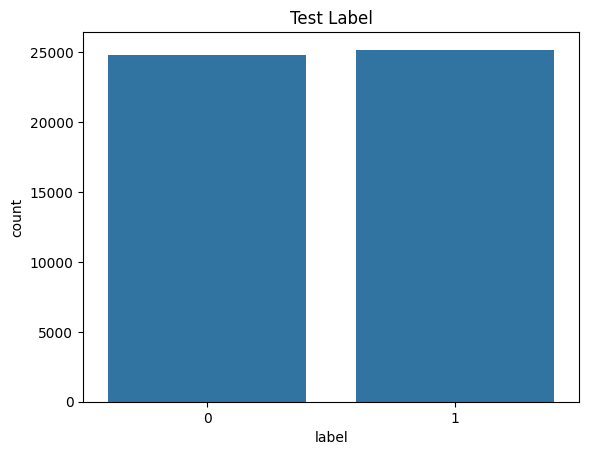

In [4]:
# 데이터 null값 확인 및 label 분포 확인 

print(train.info())
sns.countplot(train, x='label')
plt.title('Train Label')
plt.show()
print()
print('😊')
print(test.info())
sns.countplot(test, x='label')
plt.title('Test Label')
plt.show()

In [5]:
# 한글과 공백을 제외하고 모두 제거 후 값이 없는 데이터 drop
# train과 test data 모두 같은 방법으로 전처리 

# train data
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
train['document'].replace('', np.nan, inplace=True)
print('<< train >>')
print(train.isnull().sum())
train.dropna(inplace=True)
print('⬇️')
print(train.isnull().sum())
print()
print(f'train data shape :', train.shape)

print('=' * 20)

# test data
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
test['document'].replace('', np.nan, inplace=True)
print('<< test >>')
print(test.isnull().sum())
test.dropna(inplace=True)
print('⬇️')
print(test.isnull().sum())
print()
print(f'test data shape :', test.shape)

<< train >>
id            0
document    814
label         0
dtype: int64
⬇️
id          0
document    0
label       0
dtype: int64

train data shape : (149186, 3)
<< test >>
id            0
document    274
label         0
dtype: int64
⬇️
id          0
document    0
label       0
dtype: int64

test data shape : (49726, 3)


In [6]:
ㅇㅇ

NameError: name 'ᄋᄋ' is not defined

Part 4. 텍스트 데이터를 임베딩 하세요

1. 텍스트 토크나이즈를 해보세요
2. 텍스트를 벡터화 하세요
    - one-hot, count, tf-idf

Part 5. 분류 모델을 훈련하고 적용해 보세요

Part 6. 모델을 평가하세요
- XAI